# Tâche 8: les bandes électroniques

In [47]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.io.cif import CifWriter
from pymatgen import Spin
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter

import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
with MPRester("WOCEDvyZTdTuSHXq") as m:
    bandStructure = m.get_bandstructure_by_material_id("mp-15988")
    
print(" Le matériau à analyser est le Li2CuSb")

 Le matériau à analyser est le Li2CuSb


## 1) Graphe de la structure de bandes électroniques

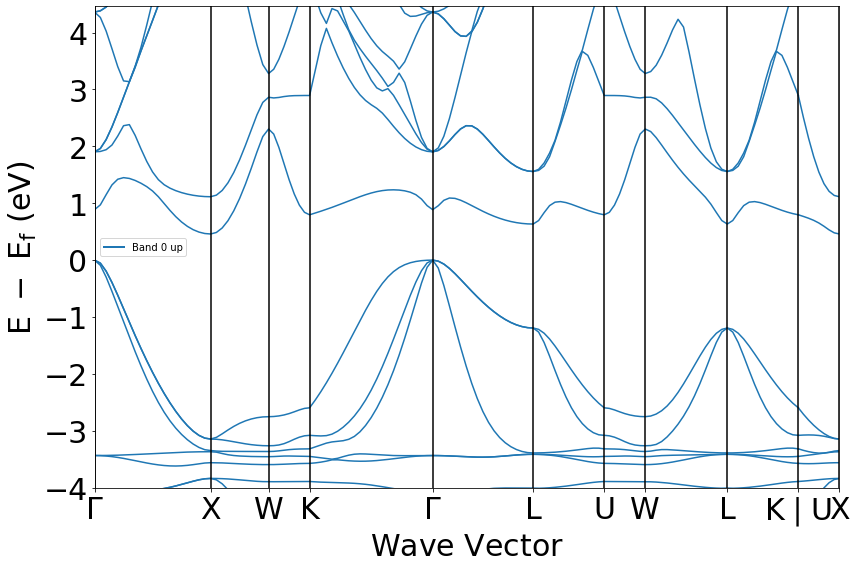

In [62]:
BSP = BSPlotter(bandStructure)
BSP.show()

## 2) La bande interdite

In [63]:
bandGap = bandStructure.get_band_gap()
print("La bande interdite est indirecte car bandGap['direct']=" , bandGap['direct'])
print('La largeur du gap est de:', bandGap['energy'], 'eV')
print("Le vecteur d'onde se déplace dans la direction:", bandGap['transition'])

La bande interdite est indirecte car bandGap['direct']= False
La largeur du gap est de: 0.45920000000000005 eV
Le vecteur d'onde se déplace dans la direction: \Gamma-X


## 3) Directions de dispersion

Soit E(k) une direction de dispersion calculée en fonction du taux de variation de l'énergie lorsqu'on varie le vecteur k
BSP
Soient VBM et CBM respectivement pour balance band maximum et conduction band minimum

### Analyse de la dernière bande de valence

In [67]:
data = BSPlotter(bandStructure).bs_plot_data()
distances = data.get('distances')
ticks = data.get('ticks')
distance = ticks.get('distance')
E_f = data.get('zero_energy')

VBM = bandStructure.get_vbm()
index_VBM = VBM['band_index']
E_VBM = VBM['energy']
KPoint_VBM = VBM['kpoint'].cart_coords

print(index_VBM, "\n")
print("- La dernière bande de valence est la bande 13")
print("- On retrouve sur le graphe (ci-dessous), le maximum de la dernière bande de valence (VBM) en E_VBM - E_f =", E_VBM-E_f, "eV")
print("remarque: ici le maximum est le même pour les 3 dernières bandes de valence")
print("où E_VBM = E_f =", E_VBM, 'eV')
print("- Avec comme vecteur k: k =", KPoint_VBM)



defaultdict(<class 'list'>, {<Spin.up: 1>: [11, 12, 13]}) 

- La dernière bande de valence est la bande 13
- On retrouve sur le graphe (ci-dessous), le maximum de la dernière bande de valence (VBM) en E_VBM - E_f = 0.0 eV
remarque: ici le maximum est le même pour les 3 dernières bandes de valence
où E_VBM = E_f = 6.4969 eV
- Avec comme vecteur k: k = [0. 0. 0.]


### Analyse de la première bande de conduction 

In [68]:
CBM = bandStructure.get_cbm()
index_CBM = CBM['band_index']
E_CBM = CBM['energy']
KPoint_CBM = CBM['kpoint'].cart_coords

print(index_CBM, "\n")
print("- La première bande de conduction est la bande 14")
print("- On retrouve sur le graphe (ci-dessous), le minimum de la première bande de conduction (CBM) en E_CBM - E_f =", E_CBM-E_f, "eV")
print("où E_CBM = ", E_VBM, 'eV')
print("- Avec comme vecteur k: k =", KPoint_CBM)

defaultdict(<class 'list'>, {<Spin.up: 1>: [14]}) 

- La première bande de conduction est la bande 14
- On retrouve sur le graphe (ci-dessous), le minimum de la première bande de conduction (CBM) en E_CBM - E_f = 0.45920000000000005 eV
où E_CBM =  6.4969 eV
- Avec comme vecteur k: k = [ 1.66533454e-16  9.92025397e-01 -5.55111512e-17]


## Plot du graphe 

Text(0.5, 1.0, 'Structure des bandes électroniques du Li2CuSb')

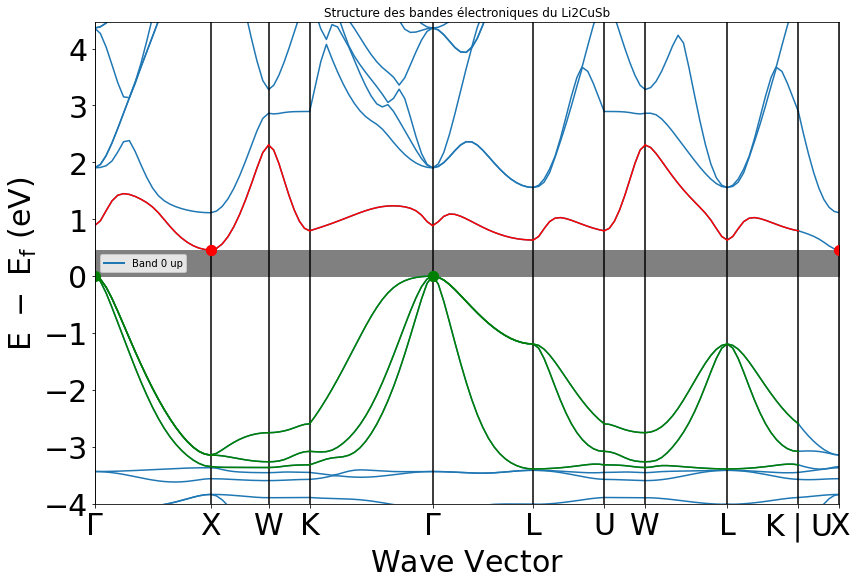

In [70]:
# Initialisation de quelques données
plot = plotter.BSPlotter(bandStructure)
energy = data.get('energy')
plot.get_plot()

# Afin de faire apparaitre en vert les dernières bande de valence
#    et en rouge la première bande de conduction
for i in range(9):
    plt.plot(distances[i],energy.get('1')[i][11],'green')
    plt.plot(distances[i],energy.get('1')[i][12],'green')
    plt.plot(distances[i],energy.get('1')[i][13],'green')
    plt.plot(distances[i],energy.get('1')[i][14],'red')
    
# Afin de faire apparaitre les CBM sur le graphe
cbms = data.get('cbm')
for i in range(len(cbms)):
    (x,y) = cbms[i]
    plt.plot(x, y, 'or', markersize = 10)

# Afin de faire apparaitre les VBM sur le graphe    
vbms = data.get('vbm')
for i in range(len(vbms)):
    (x,y) = vbms[i]
    plt.plot(x, y, 'og', markersize = 10)

# Afin de tracer la bande interdite 
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandGap.get('energy'), color = "grey")

# Pour le titre 
plt.title('Structure des bandes électroniques du Li2CuSb')

### Légende du graphe:
- Le point rouge représente le minimum de la bande première de conduction (en rouge), la bande 14
- Les points verts représentent les maximums des trois dernières bandes de valence (en vert), les bandes 11, 12, 13
- La bande interdite est coloriée en gris
- Les autres bandes bleues

# 3) Masses effectives

En supposant que la dispersion est parabolique, en isolant la masse effective et pour un k donné à 3 dimensions, nous pouvont faire ce calcul:

In [71]:
h_bar = 6.5821e-16
m_e = 9.11e-31
m_VBM = (h_bar**2 * (KPoint_VBM[0]**2+KPoint_VBM[1]**2+KPoint_VBM[2]**2))/(2*abs(E_VBM))
m_CBM = (h_bar**2 * (KPoint_CBM[0]**2+KPoint_CBM[1]**2+KPoint_CBM[2]**2))/(2*E_CBM)
print('La masse effective au maximum de la dernière bande de valence =', m_VBM, 'kg', '=',  m_VBM/m_e, 'm_e')
print('La masse effective au minimum de la première bande de conduction =', m_CBM, 'kg')

La masse effective au maximum de la dernière bande de valence = 0.0 kg = 0.0 m_e
La masse effective au minimum de la première bande de conduction = 3.0646347492418965e-32 kg
